In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_test)


In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
mse

4.173733526278069

In [11]:
r2

0.8931910882178442

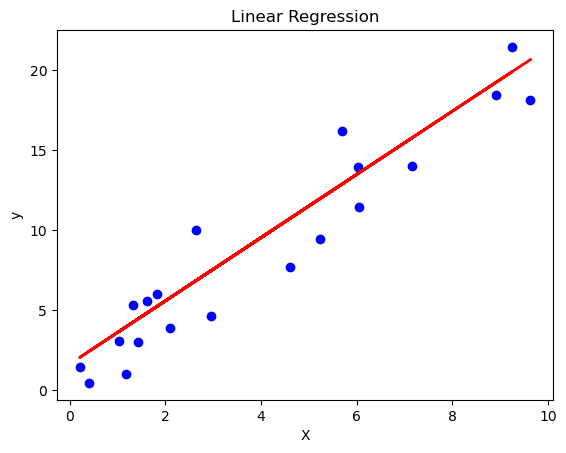

In [12]:
# Plot the data and regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

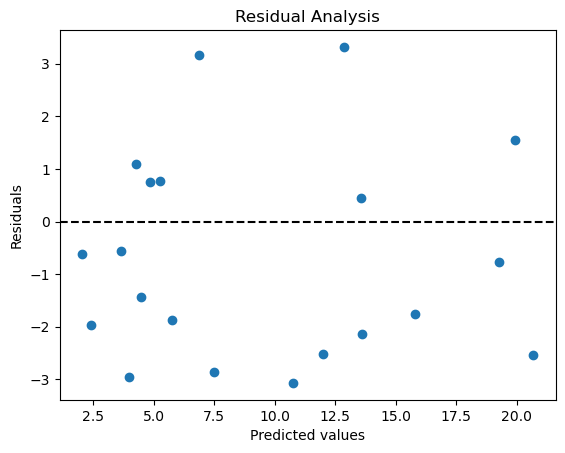

In [15]:
# Assumption checks
# Residual analysis
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


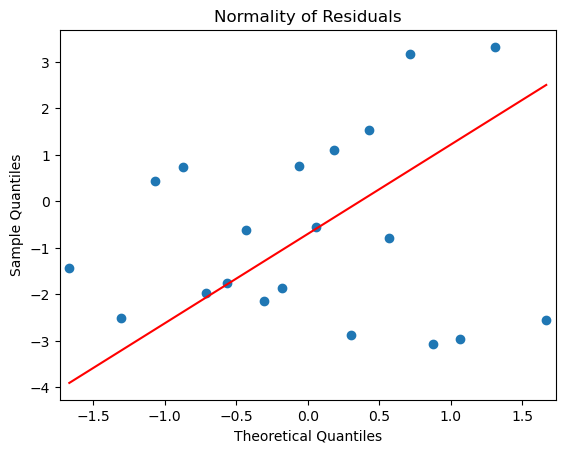

In [16]:
# Normality of residuals
qqplot(residuals, line='s')
plt.title('Normality of Residuals')
plt.show()

In [17]:
# Heteroscedasticity test
lm, lmpvalue, fvalue, fpvalue = het_breuschpagan(residuals, X_test)
print("Breusch-Pagan test p-value:", lmpvalue)

Breusch-Pagan test p-value: nan


In [18]:
# Multicollinearity check
X_train_vif = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
vif = [variance_inflation_factor(X_train_vif, i) for i in range(X_train_vif.shape[1])]
print("Variance Inflation Factors:", vif)

Variance Inflation Factors: [4.048586239199109, 1.0]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     611.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.15e-38
Time:                        11:00:51   Log-Likelihood:                -168.41
No. Observations:                  80   AIC:                             340.8
Df Residuals:                      78   BIC:                             345.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6447      0.453      3.635      0.0

ValueError: x and y must be the same size

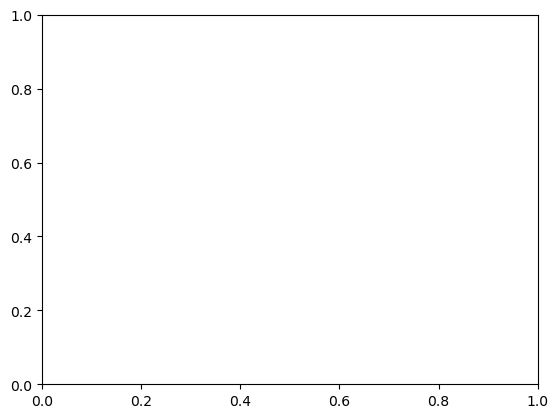

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model
X_train = sm.add_constant(X_train)  # Add a constant term for intercept
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model summary
print(model.summary())

# Residual analysis
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Normality of residuals
qqplot(residuals, line='s')
plt.title('Normality of Residuals')
plt.show()

# Heteroscedasticity test
lm, lmpvalue, fvalue, fpvalue = het_breuschpagan(residuals, X_test)
print("Breusch-Pagan test p-value:", lmpvalue)

# Multicollinearity check
vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print("Variance Inflation Factors:", vif)


In [21]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model using statsmodels
X_train = sm.add_constant(X_train)  # Add a constant term for intercept
model = sm.OLS(y_train, X_train).fit()

# Perform the F-test for model significance
f_test = model.f_test("x1 = 0")  # Testing the significance of the coefficient for x1

# Print F-test results
print("F-statistic:", f_test.fvalue[0][0])
print("p-value:", f_test.pvalue)


TypeError: 'float' object is not subscriptable